In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

/home/hwixley/packages/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
ds_loc = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
ds = pd.read_csv(ds_loc)
ds

ds["revision_time"]
ds.describe

<bound method NDFrame.describe of     revision_time  exam_score
0           2.723      27.682
1           2.844      22.998
2           3.303      19.765
3           3.588      24.481
4           4.050      22.974
5           4.080      27.086
6           5.674      26.136
7           6.060      27.038
8           6.347      31.283
9           6.819      14.731
10          7.098      28.946
11          7.515      26.901
12          8.356      35.299
13          9.214      24.228
14         10.364      34.651
15         10.510      34.667
16         12.102      34.848
17         13.187      37.266
18         16.692      43.491
19         16.977      45.201
20         18.330      40.924
21         19.599      48.321
22         20.321      49.574
23         21.280      47.239
24         21.578      45.582
25         21.798      53.182
26         22.048      39.956
27         24.949      52.697
28         25.147      54.900
29         26.495      66.065
30         26.535      60.068
31    

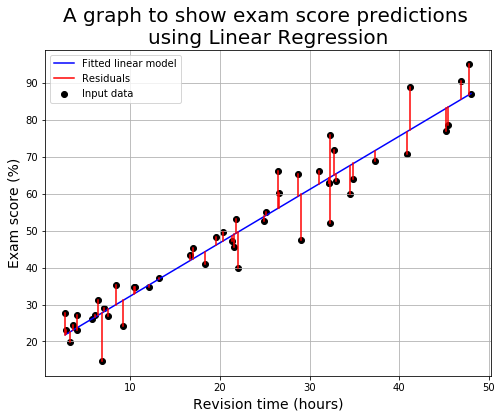

30.985472614541305

In [3]:
#QUESTIONS 1b & 1c

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import numpy as np

X = ds["revision_time"].values.reshape(-1,1)

Y = ds["exam_score"]


#Y.shape
model = sklearn.linear_model.LinearRegression(fit_intercept=True)

#model.fit(X,Y)
#y_pred = model.predict(X)

w = np.zeros((50,2))
for k in range(50):
    w[k,0] = Y[k]/1
    w[k,1] = Y[k]/X[k]

#newX = np.ones((50,2))
#newX[:,1] = X

model.fit(X,Y)
y_pred = model.predict(X)

#mean_squared_error(Y,y_pred)
#mean_absolute_error(Y,y_pred)
plt.figure(figsize=(8,6))
plt.grid(True)
plt.scatter(X,Y, color='black', label='Input data')
plt.plot(X,y_pred, color = 'blue', label='Fitted linear model')

for j in range(50):
    
    x1 = np.ones(2,)*X[j]
    y = np.ones(2,)
    y[0] = Y[j]
    y[1] = y_pred[j]
    if j == 49:
        plt.plot(x1,y,color='red', label = 'Residuals')
    else:
        plt.plot(x1,y,color='red')

plt.xlabel('Revision time (hours)', size =14)
plt.ylabel('Exam score (%)', size =  14)
plt.title('A graph to show exam score predictions \nusing Linear Regression', size = 20)
plt.legend(loc="upper left")
plt.show()

mseSklearn = sm.mean_squared_error(Y,y_pred)
mseSklearn

In [4]:
#QUESTION 1d

import numpy as np
import sklearn.metrics as sm

W = np.ones((2,1))

X = np.ones((ds["revision_time"].size, 2))
X[:,1] = np.array(ds["revision_time"])

Y = np.matrix(ds["exam_score"]).reshape(-1,1)

phi = X


pseudoInversePhi = np.matmul(np.matrix(np.matmul(phi.transpose(), phi)).I, phi.transpose())

w_hat = np.matmul(pseudoInversePhi, Y)

print(w_hat)

[[17.89768026]
 [ 1.44114091]]


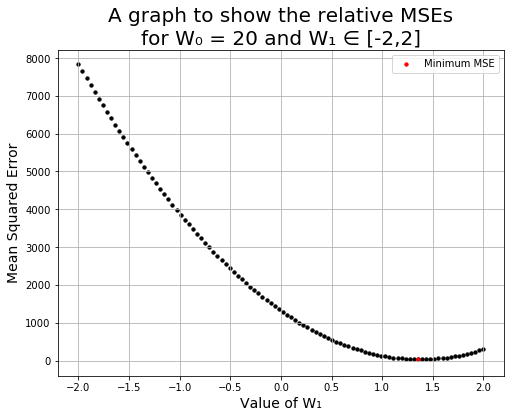

32.48096161535148


1.3535353535353538

In [5]:
#Question 1g

w1 = np.linspace(-2,2,100)
mseS = np.zeros((100))

for i in range(100):
    w = np.array([[20],[w1[i]]])
    y_pred = np.matmul(X,w)
    
    mseS[i] = sm.mean_squared_error(Y,y_pred)

minIndex = mseS.argmin()
    
plt.figure(figsize=(8,6))
plt.grid(True)
plt.scatter(w1,mseS, color='black', s=11)#, label='Normal data points')
plt.scatter(w1[minIndex], mseS[minIndex], c = 'red', s=11, label='Minimum MSE')

plt.xlabel('Value of W₁', size =14)
plt.ylabel('Mean Squared Error', size =  14)
plt.title('A graph to show the relative MSEs\nfor W₀ = 20 and W₁ ∈ [-2,2]', size = 20)
plt.legend(loc="upper right")
plt.show()

print(mseS[minIndex])
w1[minIndex]

In [88]:
ds_loc = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
ds = pd.read_csv(ds_loc)
ds.describe

<bound method NDFrame.describe of     input  output
0   2.728   9.088
1   3.244  12.786
2  -4.164 -10.016
3   4.875  32.976
4   3.329  10.437
5   4.268  21.681
6  -2.879  -5.204
7  -2.276  -1.465
8   2.688   8.539
9   2.780   6.929
10  3.874  15.765
11 -4.826 -15.577
12  2.633  11.382
13  2.815   9.853
14  4.441  24.914
15  1.345   3.977
16 -4.616 -15.291
17  1.405  -0.154
18 -2.588  -0.988
19  0.992  -1.133
20  3.276  10.743
21 -0.597   0.536
22 -3.772  -6.342
23 -2.848  -1.673
24  4.310  25.919>

AttributeError: 'function' object has no attribute 'fit'

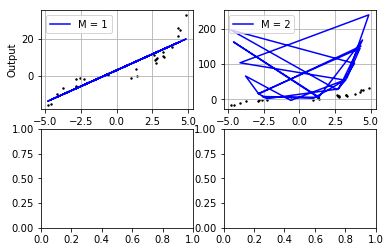

In [130]:
#QUESTION 2a

from sklearn.linear_model import LinearRegression

def PolyCoefficients(x, coeffs):
    y = np.zeros((25,1))
    for i in range(len(coeffs)):
        y[:,0] += coeffs[i]*x[:,i]**i

    return y

Y = ds["output"]
x = ds["input"]
X1 = np.ones((25,2))
X2 = np.ones((25,3))
X3 = np.ones((25,4))
X4 = np.ones((25,5))

X1[:,1] = x
X2[:,1] = x
X2[:,2] = x*x
X3[:,1] = x
X3[:,2] = x*x
X3[:,3] = x*x*x
X4[:,1] = x
X4[:,2] = x*x
X4[:,3] = x*x*x
X4[:,4] = x*x*x*x

def model(phi):
    val = np.matmul(np.matmul(np.matrix(np.matmul(phi.transpose(), phi)).I, phi.transpose()),Y)
    vList = np.zeros(val.shape[1])
    for i in range(val.shape[1]):
        vList[i] = val[0,i]
    return vList
        

#model = sklearn.linear_model.LinearRegression(fit_intercept=True)

fig, axs = plt.subplots(2, 2)

#model.fit(X1,Y)
#yp1 = model.predict(X1)

yp1 = PolyCoefficients(X1, model(X1))
axs[0,0].scatter(x,Y, c='black', s= 2, label = '')
axs[0,0].plot(x,yp1, c='blue', label='M = 1')
axs[0,0].legend(loc ="upper left")
axs[0,0].set(xlabel = 'Input', ylabel = 'Output')
axs[0,0].grid()

#model.fit(X2,Y)
#yp2 = model.predict(X2)

yp2 = PolyCoefficients(X2, model(X2))
axs[0,1].scatter(x,Y, c='black', s= 2, label = '')
axs[0,1].plot(x,yp2, c='blue', label='M = 2')
axs[0,1].legend(loc ="upper left")
axs[0,1].grid()

model.fit(X3,Y)
yp3 = model.predict(X3)
axs[1,0].scatter(X1,Y, c='black', s= 2, label = '')
axs[1,0].plot(X1,yp3, c='blue', label='M = 3')
axs[1,0].legend(loc ="upper left")
axs[1,0].set(xlabel = 'Input', ylabel = 'Output')
axs[1,0].grid()

model.fit(X4,Y)
yp4 = model.predict(X4)
axs[1,1].scatter(X1,Y, c='black', s= 2, label = '')
axs[1,1].plot(X1,yp4, c='blue', label='M = 4')
axs[1,1].legend(loc ="upper left")
axs[1,1].set(xlabel = 'Input')
axs[1,1].grid()

fig.suptitle('Graphs to predict the outputs of our dataset using\npolynomial regression models of different degree')

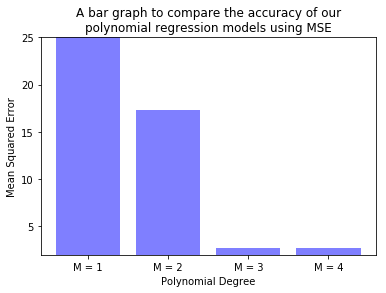

In [119]:
#QUESTION 2b

objects = ('M = 1','M = 2','M = 3','M = 4')
y_pos = np.arange(len(objects))

mse1 = sm.mean_squared_error(Y,yp1)
mse2 = sm.mean_squared_error(Y,yp2)
mse3 = sm.mean_squared_error(Y,yp3)
mse4 = sm.mean_squared_error(Y,yp4)
performance = [mse1,mse2,mse3,mse4]

plt.bar(y_pos, performance,color='blue', align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.xlabel('Polynomial Degree')
plt.title('A bar graph to compare the accuracy of our\npolynomial regression models using MSE')
plt.ylim(2,25)

plt.show()

In [63]:
#QUESTION 2c

mse3-mse4

0.005845540176889319

In [34]:
#QUESTION 2d

def rbf(x,c,a):
    val = (-0.5*((x-c)**2))/(a**2)
    return np.exp(val)

phi = np.ones((50,5))

phi1 = phi.copy()
phi1[:,1] = rbf(x,-4,0.2)
phi1[:,2] = rbf(x,-2,0.2)
phi1[:,3] = rbf(x,2,0.2)
phi1[:,4] = rbf(x,4,0.2)

phi2 = phi.copy()
phi2[:,1] = rbf(x,-4,100)
phi2[:,2] = rbf(x,-2,100)
phi2[:,3] = rbf(x,2,100)
phi2[:,4] = rbf(x,4,100)

phi3 = phi.copy()
phi3[:,1] = rbf(x,-4,1000)
phi3[:,2] = rbf(x,-2,1000)
phi3[:,3] = rbf(x,2,1000)
phi3[:,4] = rbf(x,4,1000)

0      2.723
1      2.844
2      3.303
3      3.588
4      4.050
5      4.080
6      5.674
7      6.060
8      6.347
9      6.819
10     7.098
11     7.515
12     8.356
13     9.214
14    10.364
15    10.510
16    12.102
17    13.187
18    16.692
19    16.977
20    18.330
21    19.599
22    20.321
23    21.280
24    21.578
25    21.798
26    22.048
27    24.949
28    25.147
29    26.495
30    26.535
31    28.687
32    29.055
33    31.043
34    32.176
35    32.203
36    32.226
37    32.268
38    32.711
39    32.886
40    34.489
41    34.889
42    37.299
43    40.875
44    41.249
45    45.213
46    45.397
47    46.923
48    47.818
49    48.011
Name: revision_time, dtype: float64